In [1]:
include("../deps/dataProcessKit/dataProcessKit.jl")
using .dataProcessKit
include("../deps/dataProcessKit/myDraw.jl")
using .myDraw

In [2]:
ge, smp=jload2("adult_gene_DESeq2_test.jld2", "sample_name");
#ge, smp=jload2("E18_gene_DESeq2_test.jld2", "sample_name");

┌ Warning: 1 data are either NaN or Inf. They are ignored.
└ @ myDraw ~/myjulia/modules/myDraw.jl:2357


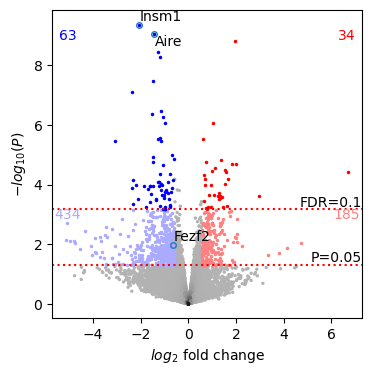

In [3]:
figure(figsize=(4, 4))
yy=-log10.(ge["rawP"])
xx=ge["lgFC"]
grp=@withrow ge begin
    if ($FDR<0.1) .& (abs.($lgFC).>log2(1.5))
        $lgFC<0 ? 4 : 5
    elseif ($rawP<0.05) .& (abs.($lgFC).>log2(1.5))
        $lgFC<0 ? 2 : 3
    else
        1
    end
end
colorls=[blendcolor("w", "b", 0.667), blendcolor("w", "r"), "b", "r"]
grploop(fastgrp(grp, 1:5), xx, yy, id=true) do gi, x, y
    if gi==1
        kdescatter(x, y, s=2, cmap="binary", normto=(0.3, 1), rasterized=true)
    else
        plot(x, y, ".", ms=3, color=colorls[gi-1], rasterized=true)
    end
#    plot(x, y, ".", ms=3, color=["0.75", colorls...][gi])
end
N=freqas(2:5, grp)
for (x, y, n, c) in zip([0.05, 0.95, 0.05, 0.95], [3, 3, 9, 9], N, colorls)
    txtplotrl(x, y, string(n), color=c, rl=:x)
end

fdr01=@with ge (minimum($rawP[$FDR.>0.1])+maximum($rawP[$FDR.<0.1]))/2
guideline("-", -log10(fdr01), label="FDR=0.1")
guideline("-", -log10(0.05), label="P=0.05")
#guideline("|", log2(1.5).*[1, -1])
#guideline("|", "k:")
xlabel(k"$log_2$ fold change")
ylabel(k"$-log_{10}(P)$")

l=ismbr(ge["gene_name"], c"Aire, Insm1, Fezf2")
plot(xx[l], yy[l],"o",mfc="none",ms=4)
txtplot(xx[l], yy[l], ge["gene_name"][l], repel=true)#, repel_kw=(arrowprops=ds(arrowstyle="->", color="k", lw=0.5),))

pltsave("Volcano_plot_adult_Insm1_ko2")
#pltsave("Volcano_plot_E18_Insm1_ko2")